#  개별 종목의 일별시세 데이터 출력

### 라이브러리 설치 및 불러오기

In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr
import pandas as pd

### 종목코드로 종목을 찾아 일별 시세 수집

In [ ]:
# 삼성전자, 2020년 8월 1일 ~ 2021년 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'

price = fdr.DataReader('005930', "20200801", "2022")   # 연도만 기입할 경우, 해당 연도 이전 12월 31일까지 출력됨. 현재까지 시세를 받고 싶다면 2022 입력
price

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-08-03,57800,57900,56700,56800,21158940,-0.018998
2020-08-04,57200,58100,57000,57300,19419694,0.008803
2020-08-05,57300,57500,56300,56900,17739706,-0.006981
2020-08-06,57100,58400,57100,58000,21625874,0.019332
2020-08-07,57900,58400,57100,57500,18751717,-0.008621
...,...,...,...,...,...,...
2021-08-06,81900,82500,81300,81500,13342623,-0.007308
2021-08-09,81500,82300,80900,81500,15522581,0.000000
2021-08-10,82300,82400,80100,80200,20362639,-0.015951


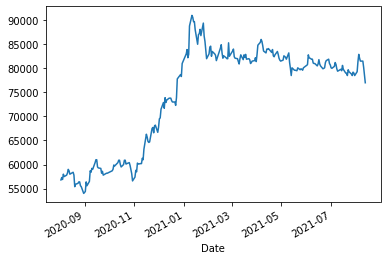

In [ ]:
#  그래프 그리기 (종가데이터 출력)
price["Close"].plot()

### 종목명으로 종목코드 받아오는 함수 만들기

In [ ]:
df_krx = fdr.StockListing("KRX")

In [ ]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만들기

def item_code_by_item_name(item_name):
    # 종목명을 받아 종목코드를 찾아 반환하는 함수
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False
        # 예외처리

In [ ]:
item_code_by_item_name("삼성전자")

'005930'

In [ ]:
# 종목명을 잘못넣었을 경우
item_code_by_item_name("네이버")

False

In [ ]:
item_code_by_item_name("NAVER")

'035420'

### 종목명으로 일별시세를 받아오는 함수 만들기

In [ ]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2021년 데이터를 선택

def find_item_list(item_name, year=2022):
    # 종목명을 넘겨주면 일별시세를 반환하는 함수
    # 내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로 종목의 시세를 수집
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [ ]:
find_item_list("NAVER", 2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,155820,157621,155219,155620,30777,0.002577
2017-01-03,155618,155618,153616,153617,51766,-0.012871
2017-01-04,155220,162230,154419,162230,120359,0.056068
2017-01-05,162228,162228,158423,158424,68724,-0.023461
2017-01-06,158423,160426,157422,160026,50269,0.010112
...,...,...,...,...,...,...
2021-08-06,443000,447500,440500,444500,416829,0.004520
2021-08-09,438000,449000,435000,447500,528032,0.006749
2021-08-10,446000,453500,442500,446500,461940,-0.002235


In [ ]:
find_item_list("크래프톤",2021)
# 크래프톤의 경우 상장일이 20221년 8월 10일이기 때문에 상장일부터 출력

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-10,448500,480000,400500,454000,5121520,NaN
2021-08-11,444500,446000,405000,407000,1647759,-0.103524
2021-08-12,414000,420500,402000,406000,927323,-0.002457


### 개별종목의 시세정보 데이터 시각화

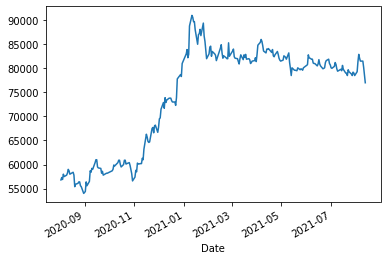

In [ ]:
# 종가 그래프를 그리기는 위 종가데이터 출력 참조
price["Close"].plot()

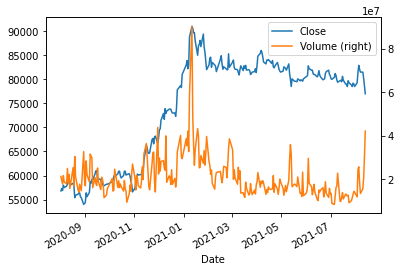

In [ ]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
price[["Close", "Volume"]].plot(secondary_y="Volume")